In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os


os.makedirs("figs/", exist_ok=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

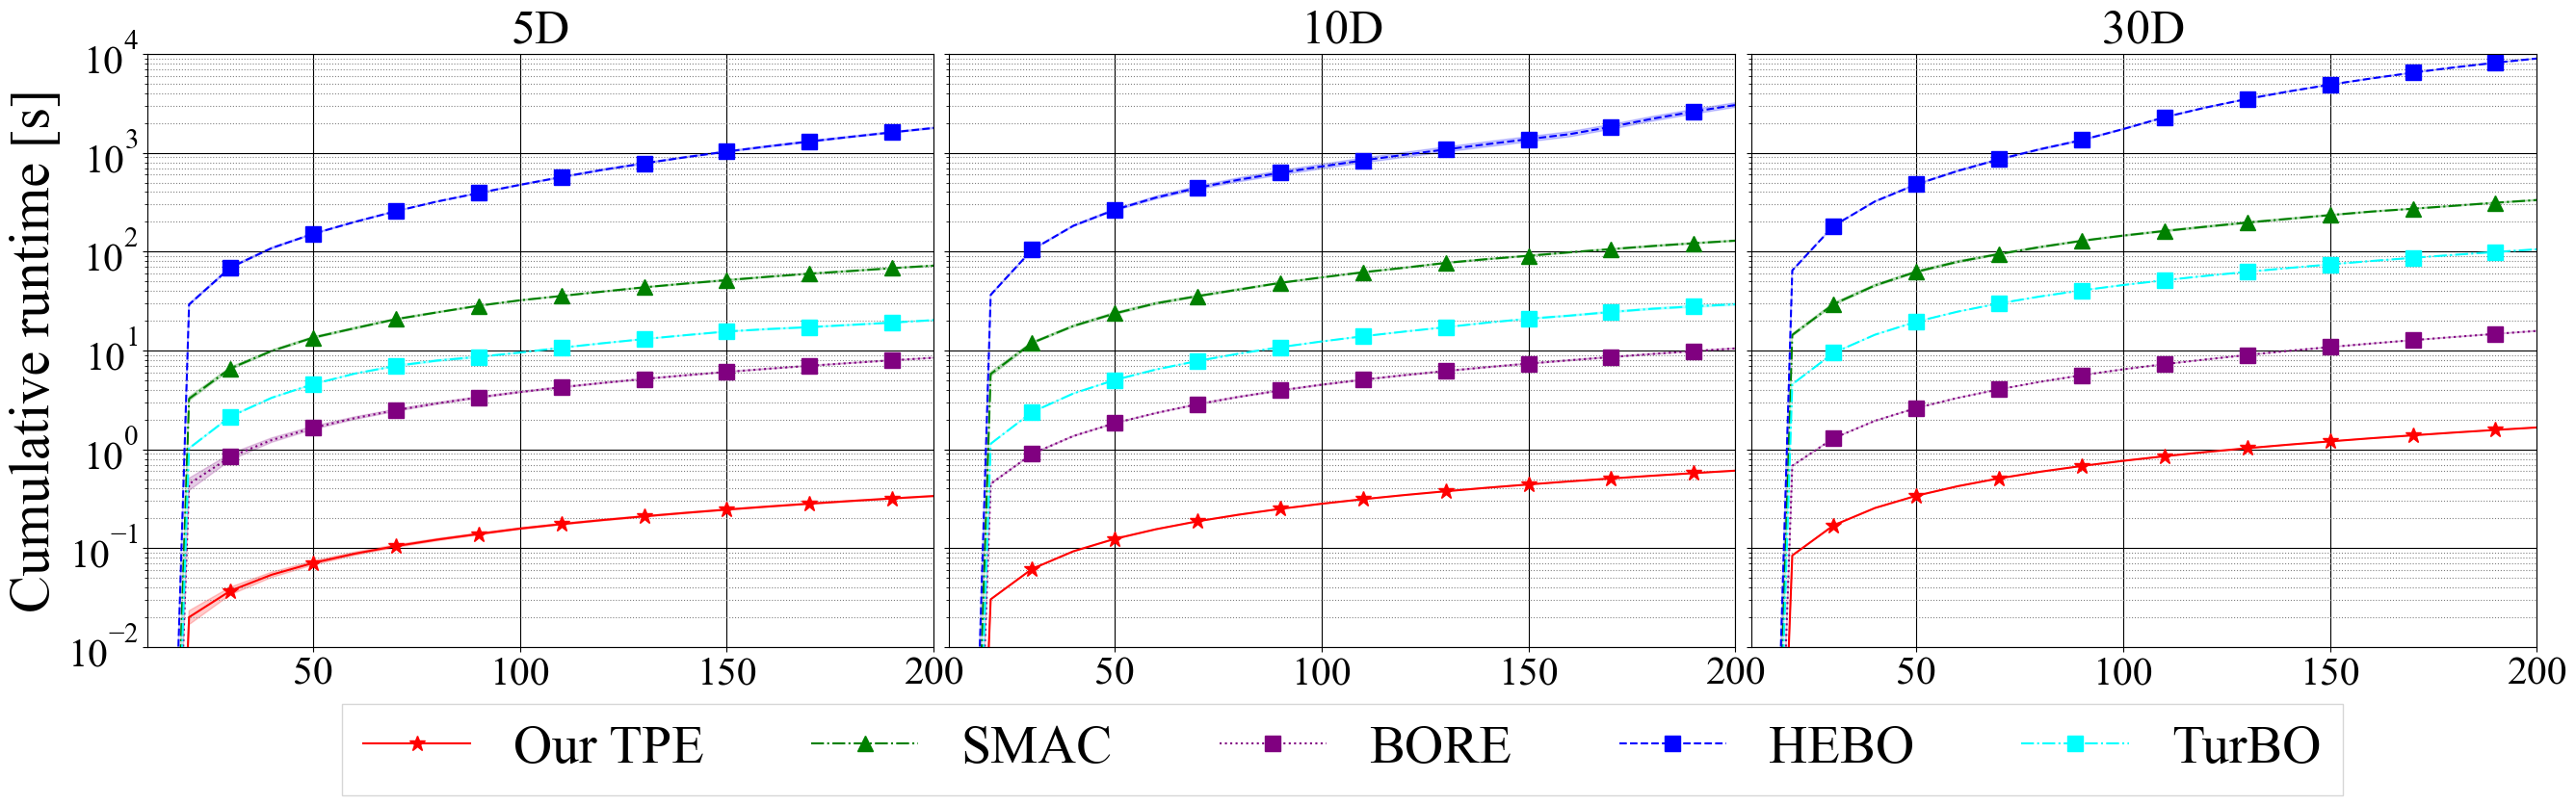

In [2]:
_, axes = plt.subplots(
    ncols=3,
    nrows=1,
    sharex=True,
    sharey=True,
    figsize=(32, 8),
    gridspec_kw=dict(
        wspace=0.02,
        hspace=0.1,
    )
)

COLOR_DICT = {
    "tpe": "red",
    "smac": "green",
    "bore": "purple",
    "hebo": "blue",
    "turbo": "cyan",
}

LINESTYLE_DICT = {
    "tpe": None,
    "bore": "dotted",
    "hebo": "dashed",
    "smac": "dashdot",
    "turbo": "dashdot",
}
MARKER_DICT = {
    "tpe": "*",
    "bore": "s",
    "hebo": "s",
    "smac": "^",
    "turbo": "s",
}


dx = np.arange(1, 21) * 10
labels = ["Our TPE", "SMAC", "BORE", "HEBO", "TurBO"]

for idx, dim in enumerate(["05", "10", "30"]):
    ax = axes[idx]
    lines = []
    for opt, color in COLOR_DICT.items():
        data = np.array(json.load(open(f"runtime/{opt}/{dim}d.json"))) + 1e-12
        if data.size == 0:
            print(f"Skip {opt} {dim}")
            continue

        m = np.mean(data, axis=0)
        s = np.std(data, axis=0) / np.sqrt(10)
        line, = ax.plot(
            dx,
            m,
            color=color,
            ls=LINESTYLE_DICT[opt],
            marker=MARKER_DICT[opt],
            markevery=2,
            markersize=12,
        )
        lines.append(line)
        ax.fill_between(dx, m - s, m + s, color=color, alpha=0.2)

    ax.set_title(f"{int(dim)}D", fontsize=36)
    ax.set_yscale("log")
    ax.set_xlim(10, 200)
    ax.set_ylim(1e-2, 1e4)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.grid(which='minor', color='gray', linestyle=':')
    ax.grid(which='major', color='black')

    if idx == 0:
        ax.set_ylabel("Cumulative runtime [s]", fontsize=42)

axes[1].legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=40,
    bbox_to_anchor=(0.5, -0.05),  # ここは調整が必要です
    fancybox=False,
    ncol=len(labels),
)
plt.savefig("figs/runtime-comparison.pdf", bbox_inches="tight")